In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df['make'].values

array(['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi',
       'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw',
       'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet',
       'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge',
       'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'isuzu', 'isuzu', 'jaguar', 'jaguar', 'jaguar', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mercedes-benz', 'mercedes-benz',
       'mercedes-benz', 'mercedes-benz', 'mercedes-benz', 'mercedes-benz',
       'mercedes-benz', 'mercedes-benz', 'mercury', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsub

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [9]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,202.000000,165.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.831683,121.836364,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,25.148515,30.658416,13253.752475
std,1.258360,35.396412,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,6.421956,6.809940,7954.919591
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,19.000000,25.000000,7778.250000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,30.000000,10320.000000
75%,2.000000,150.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,30.000000,34.000000,16502.250000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [10]:
df.isnull().sum().head(10)

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
dtype: int64

In [11]:
len(df)

202

In [12]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()
df5=df.copy()
df6=df.copy()
df7=df.copy()
df8=df.copy()

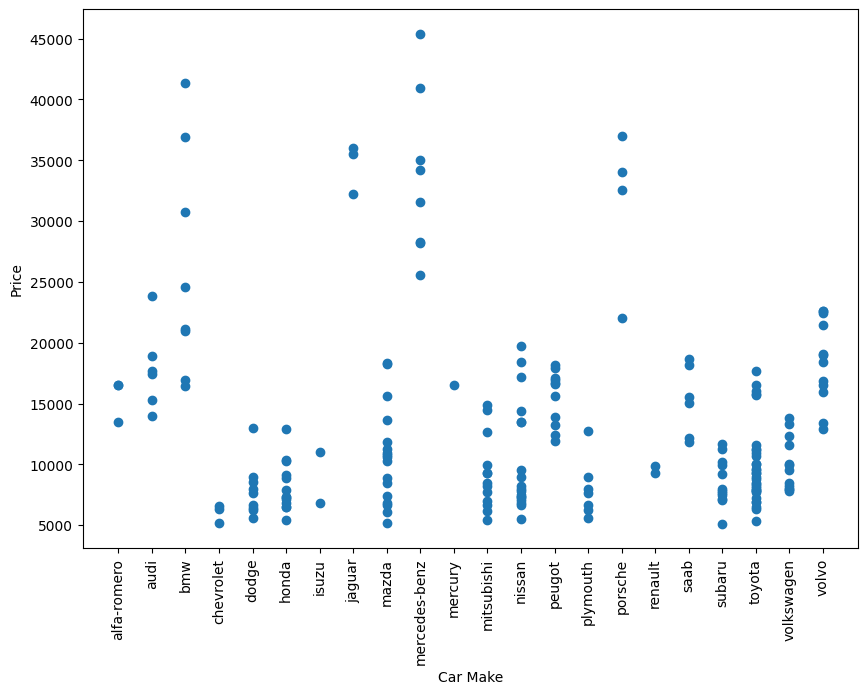

In [13]:
plt.figure(figsize=(10,7))
df2['Make_Encoded']=df2['make'].astype('category').cat.codes

plt.scatter(df2['Make_Encoded'],df2['price'])

plt.xticks( 
    ticks=df2['Make_Encoded'].unique(),
    labels=df2['make'].astype('category').cat.categories,
    rotation=90
    )

plt.xlabel("Car Make")
plt.ylabel("Price")
plt.show()


In [14]:
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model1=LinearRegression()

In [17]:
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [18]:
# df1.drop('make_encoded',axis=1,inplace=True)

In [19]:
df1['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
df1['price']=df1['price'].astype(float)

In [21]:
df1.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

## Handled missing values

In [23]:
df1['normalized-losses'].fillna(df1['normalized-losses'].median(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_7488\1663027690.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['normalized-losses'].fillna(df1['normalized-losses'].median(),inplace=True)


In [24]:
df1['num-of-doors'].fillna(df1['num-of-doors'].mode()[0],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_7488\615103914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['num-of-doors'].fillna(df1['num-of-doors'].mode()[0],inplace=True)


In [25]:
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470.0
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  202 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [27]:
dfz=df4.drop(['symboling','normalized-losses','wheel-base','curb-weight','compression-ratio','city-mpg'],axis=1)

In [28]:
dfz

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,horsepower,peak-rpm,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,dohc,four,130,mpfi,3.47,2.68,111,5000,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,dohc,four,130,mpfi,3.47,2.68,111,5000,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,65.5,52.4,ohcv,six,152,mpfi,2.68,3.47,154,5000,26,16500
3,audi,gas,std,four,sedan,fwd,front,176.6,66.2,54.3,ohc,four,109,mpfi,3.19,3.4,102,5500,30,13950
4,audi,gas,std,four,sedan,4wd,front,176.6,66.4,54.3,ohc,five,136,mpfi,3.19,3.4,115,5500,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,volvo,gas,turbo,four,sedan,rwd,front,188.8,68.8,55.5,ohc,four,141,mpfi,3.78,3.15,160,5300,25,19045
198,volvo,gas,std,four,sedan,rwd,front,188.8,68.9,55.5,ohcv,six,173,mpfi,3.58,2.87,134,5500,23,21485
199,volvo,diesel,turbo,four,sedan,rwd,front,188.8,68.9,55.5,ohc,six,145,idi,3.01,3.4,106,4800,27,22470
200,volvo,gas,turbo,four,sedan,rwd,front,188.8,68.9,55.5,ohc,four,141,mpfi,3.78,3.15,114,5400,25,22625


In [29]:
df4.select_dtypes(['int64','float64']).corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
symboling,1.000000,0.531064,-0.541598,-0.370773,-0.250262,-0.551691,-0.238419,-0.112429,-0.180012,-0.028289,0.042025,-0.090242
normalized-losses,0.531064,1.000000,-0.082988,0.016348,0.096067,-0.434269,0.113232,0.163334,-0.131651,-0.251550,-0.204832,0.191829
wheel-base,-0.541598,-0.082988,1.000000,0.876689,0.816586,0.591751,0.782893,0.570654,0.247128,-0.474246,-0.545504,0.588382
length,-0.370773,0.016348,0.876689,1.000000,0.858237,0.493897,0.881257,0.684445,0.158193,-0.666999,-0.699408,0.692774
width,-0.250262,0.096067,0.816586,0.858237,1.000000,0.309088,0.866690,0.727941,0.187716,-0.635681,-0.681924,0.753236
height,-0.551691,-0.434269,0.591751,0.493897,0.309088,1.000000,0.309904,0.075776,0.258812,-0.053001,-0.107431,0.139003
curb-weight,-0.238419,0.113232,0.782893,0.881257,0.866690,0.309904,1.000000,0.848463,0.155245,-0.750710,-0.795678,0.835277
engine-size,-0.112429,0.163334,0.570654,0.684445,0.727941,0.075776,0.848463,1.000000,0.028598,-0.650490,-0.679611,0.871051
compression-ratio,-0.180012,-0.131651,0.247128,0.158193,0.187716,0.258812,0.155245,0.028598,1.000000,0.331434,0.268670,0.069881
city-mpg,-0.028289,-0.251550,-0.474246,-0.666999,-0.635681,-0.053001,-0.750710,-0.650490,0.331434,1.000000,0.972116,-0.688254


In [30]:
import seaborn as sns

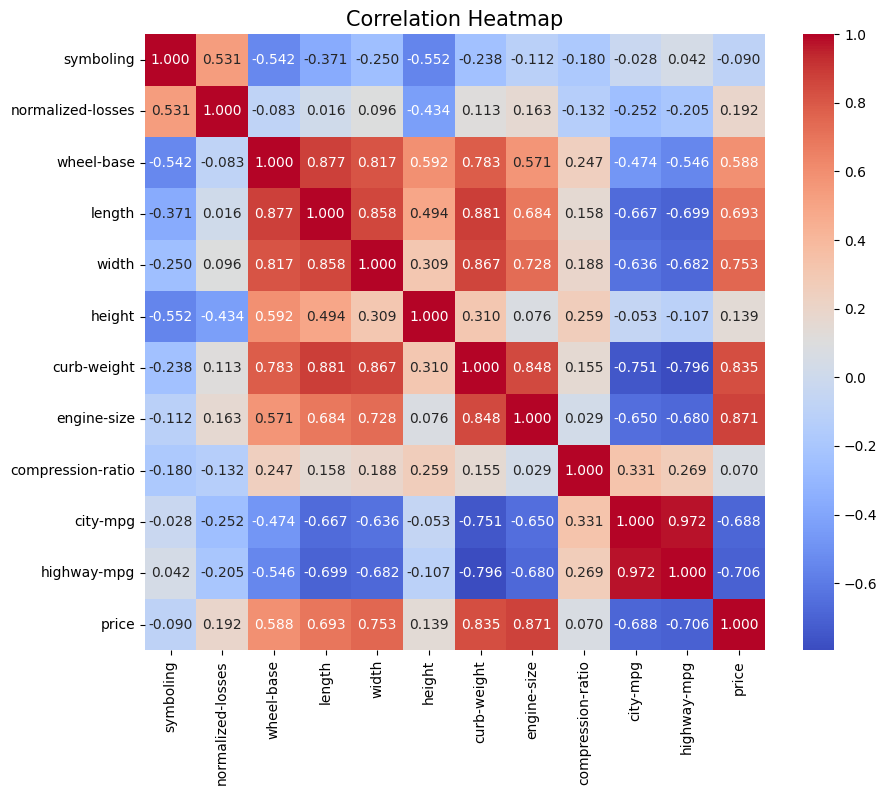

In [31]:
plt.figure(figsize=(10,8))

sns.heatmap(df2.select_dtypes(['int64','float64']).corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.3f',
            cbar=True,

            )

plt.title("Correlation Heatmap",fontsize=15)
plt.show()

In [32]:
df1[['wheel-base','length']].corr()

,wheel-base,length
wheel-base,1.000000,0.876689
length,0.876689,1.000000


## Train_test_split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x=df1.drop('price',axis=1)

In [35]:
y=df1['price']

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.80,random_state=10)

In [37]:
xtrain

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
154,0,91.0,toyota,diesel,std,four,sedan,fwd,front,95.7,...,four,110,idi,3.27,3.35,22.5,56,4500,34,36
52,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,two,70,4bbl,?,?,9.4,101,6000,17,23
129,2,104.0,saab,gas,std,four,sedan,fwd,front,99.1,...,four,121,mpfi,3.54,3.07,9.3,110,5250,21,28
83,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,four,122,2bbl,3.35,3.46,8.5,88,5000,25,32
110,0,115.0,peugot,gas,std,four,wagon,rwd,front,114.2,...,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,four,152,idi,3.7,3.52,21.0,95,4150,28,33
64,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,five,183,idi,3.58,3.64,21.5,123,4350,22,25
15,0,115.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22
125,3,115.0,porsche,gas,std,two,convertible,rwd,rear,89.5,...,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25


In [38]:
ytrain

154     7898.0
52     10945.0
129    12170.0
83      8189.0
110    16695.0
        ...   
113    17950.0
64     25552.0
15     41315.0
125    37028.0
9      16430.0
Name: price, Length: 161, dtype: float64

## Train_Test_Split for DFZ

In [39]:
x2=dfz.drop('price',axis=1)

In [40]:
y2=dfz['price']

In [41]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x2,y2,train_size=0.80,random_state=10)

## Pipeline = Preprocessing + Model training

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [43]:
cat_cols=x.select_dtypes(include='object').columns

In [44]:
num_cols=x.select_dtypes(include=['float64','int64']).columns

In [45]:
num_cols

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg',
       'highway-mpg'],
      dtype='object')

For Linear Regression

In [46]:
preprocessor=ColumnTransformer([
    ('num',StandardScaler(),num_cols),
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_cols)
])

In [47]:
pipeline=make_pipeline(preprocessor,LinearRegression())

In [48]:
pipeline

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [49]:
pipeline.fit(xtrain,ytrain)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [50]:
pipeline.score(xtrain,ytrain)

0.9877983695415169

In [51]:
pipeline.score(xtest,ytest)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 8, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8778550097506034

MAE,MSE,RMSE for Linear Regression

In [52]:
y_train_pred = pipeline.predict(xtrain)

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [54]:
mean_absolute_error(ytrain,y_train_pred)

548.3349203751162

In [108]:
mean_squared_error(ytrain,y_train_pred)

776202.3266616999

In [111]:
root_mean_squared_error(ytrain,y_train_pred)

881.0234540928521

In [55]:
y_test_pred = pipeline.predict(xtest)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 8, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
mean_absolute_error(ytest,y_test_pred) 

1921.5685147567367

In [116]:
df2['Predicted_price']=pipeline.predict(x)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 8, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [117]:
df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Make_Encoded,Predicted_price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,0,13495.043016
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,0,13495.043016
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,0,25752.802147
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.4,10.0,102,5500,24,30,13950,1,13949.989867
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.4,8.0,115,5500,18,22,17450,1,17449.947172


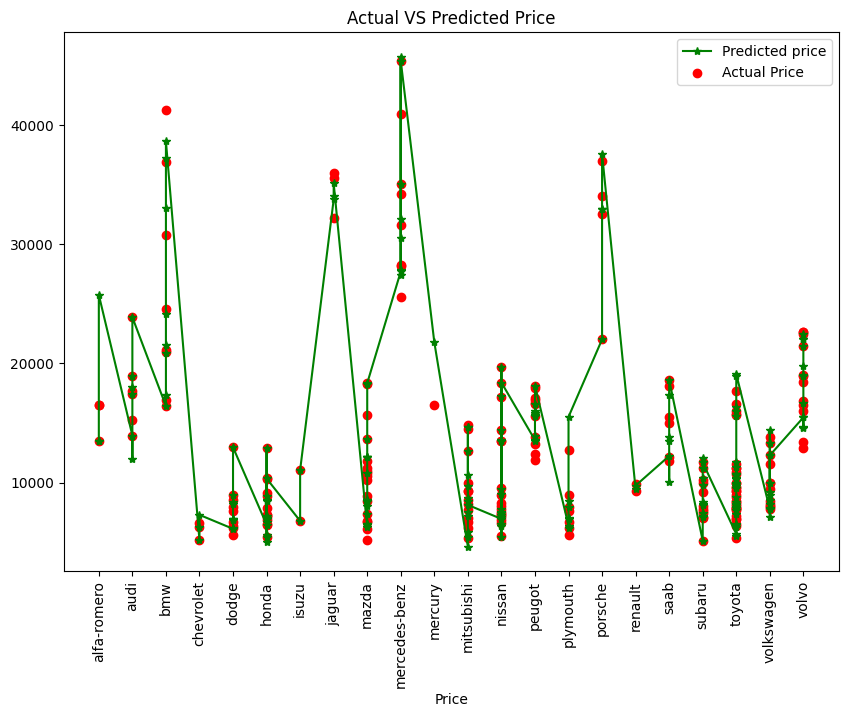

In [118]:
plt.figure(figsize=(10,7))

plt.plot(df2[['Make_Encoded']],df2['Predicted_price'],color="green",marker="*",label='Predicted price')
plt.scatter(df2['Make_Encoded'],df2['price'],color='red',label="Actual Price")

plt.xticks(
    ticks=df2['Make_Encoded'].unique(),
    labels=df2['make'].astype('category').cat.categories,
    rotation=90
)

plt.title("Actual VS Predicted Price")
plt.xlabel("Car Makers")
plt.xlabel("Price")

plt.legend()
plt.show()

pipeline for dfz

In [119]:
cat_cols_2 = x2.select_dtypes(include='object').columns

In [120]:
num_cols_2 = x2.select_dtypes(include=['float64','int64']).columns

In [121]:
preprocessor2= ColumnTransformer([
    ('num',StandardScaler(),num_cols_2),
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_cols_2)
])

In [122]:
pipeline3 = make_pipeline(preprocessor2,LinearRegression())

In [123]:
pipeline3.fit(xtrain2,ytrain2)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [124]:
pipeline3.score(xtrain2,ytrain2)

0.984541732403369

In [125]:
pipeline3.score(xtest2,ytest2)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 8, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8860940466854785

Lasso Regression

In [57]:
from sklearn.linear_model import Lasso

In [126]:
pipeline_Lasso=make_pipeline(preprocessor,Lasso(alpha=6))

In [127]:
pipeline_Lasso.fit(xtrain,ytrain)

,steps,"[('columntransformer', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [128]:
pipeline_Lasso.score(xtrain,ytrain)

0.9817746970255568

In [129]:
pipeline_Lasso.score(xtest,ytest)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 8, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.948442893819281

In [130]:
y_lasso_train_predict=pipeline_Lasso.predict(xtrain)

In [131]:
mean_absolute_error(ytrain,y_lasso_train_predict)

773.5791183273334

In [132]:
mean_squared_error(ytrain,y_lasso_train_predict)

1159396.0840734944

In [133]:
root_mean_squared_error(ytrain,y_lasso_train_predict)

1076.7525639967125

In [134]:
y_lasso_test_predict=pipeline_Lasso.predict(xtest)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 8, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [135]:
mean_absolute_error(ytest,y_lasso_test_predict)

1324.351273002134

In [136]:
mean_squared_error(ytest,y_lasso_test_predict)

3107384.3684162297

In [137]:
root_mean_squared_error(ytest,y_lasso_test_predict)

1762.7774585625464

Ridge Regression

In [138]:
from sklearn.linear_model import Ridge

In [216]:
pipeline_Ridge = make_pipeline(preprocessor,Ridge())

In [217]:
pipeline_Ridge.fit(xtrain,ytrain)

,steps,"[('columntransformer', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [218]:
pipeline_Ridge.score(xtrain,ytrain)

0.9808451217349441

In [219]:
pipeline_Ridge.score(xtest,ytest)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 8, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.9349492189924933

In [220]:
y_ridge_train_predict= pipeline_Ridge.predict(xtrain)

In [221]:
mean_absolute_error(ytrain,y_ridge_train_predict)

769.3699865092731

In [222]:
mean_squared_error(ytrain,y_ridge_train_predict)

1218530.6813583307

In [223]:
root_mean_squared_error(ytrain,y_ridge_train_predict)

1103.870772037348

In [224]:
y_ridge_test_predict= pipeline_Ridge.predict(xtest)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 8, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [225]:
mean_absolute_error(ytest,y_ridge_test_predict)

1502.134837817671

In [226]:
mean_squared_error(ytest,y_ridge_test_predict)

3920657.9854861572

In [227]:
root_mean_squared_error(ytest,y_ridge_test_predict)

1980.0651467782966

For KNN

In [126]:
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor

In [127]:
preprocessor_KNN=ColumnTransformer([
    ('num',Normalizer(),num_cols),
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_cols)
])

In [128]:
pipeline2=make_pipeline(preprocessor_KNN,KNeighborsRegressor(n_neighbors=6,weights='distance'))

In [129]:
pipeline2.fit(xtrain,ytrain)

,steps,"[('columntransformer', ...), ('kneighborsregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [130]:
pipeline2.score(xtrain,ytrain)

0.9997557405779129

In [131]:
pipeline2.score(xtest,ytest)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 8, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8339480683323235

KNN for DFZ

In [132]:
preprocessor_2_KNN = ColumnTransformer([
    ('num',Normalizer(),num_cols_2),
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_cols_2)
])

In [133]:
pipeline_4 = make_pipeline(preprocessor_2_KNN,KNeighborsRegressor(n_neighbors=6,weights='distance'))

In [134]:
pipeline_4.fit(xtrain2,ytrain2)

,steps,"[('columntransformer', ...), ('kneighborsregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [135]:
pipeline_4.score(xtrain2,ytrain2)

0.9938062941051444

In [136]:
pipeline_4.score(xtest2,ytest2)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 8, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8364841336942028

## Findings:

Linear Regression:

Before removing the less important features or noise the accuracy of trained data for linear regression is 98.7% and for test data accuracy is 87.7%.Although, after removing the noise we get the accuracy for trained data is 98.4% and for testing data it is 88.6%. 

So, In Linear Regression after removing the noise it is giving us better accuracy for unseen data. But the model is overfitted.

KNN:

Before removing the less important features or noise the accuracy of trained data for KNN is 99.9% and for test data accuracy is 83.3%.Although, after removing the noise we get the accuracy for trained data is 99.3% and for testing data it is 83.6%. 

So, In KNN with or without noise it is giving almost same accuracy.But the model is overfitted.





